<center><h3>Projeto Tera - Precificação de imóveis em Teresina</h3></center>

A precificação de um imóvel é um dos principais critérios a ser levado em consideração na hora da compra de um imóvel, seja ele para moradia ou para investimento, portanto quem está vendendo precisa analisar bem ao formatar o preço já que isso influencia bastante a quantidade de pessoas que terão interesse pelo imóvel e, ou mesmo qual será a linha de crédito utilizada, consequentemente, as oportunidades de iniciar uma negociação. A mesma lógica é aplicada para preços de aluguéis.

Nosso objeto de pesquisa foram os imóveis da cidade de Teresina, localizada ao Nordeste do Brasil. A cidade não tem praia, poucas opções turísticas, mas terrenos tão caros quanto de cidades maiores como Fortaleza e Salvador. Por isso decidimos entender mais o cenário geral e fazer análises de dados para responder às seguintes perguntas:

1. Como é a distribuição de preços de imóveis a venda na cidade?
2. Quais são as zonas mais caras e mais baratas?
**3. Quais características mais influenciam no preço no dataset e por bairro?**
4. Como filtrar imóveis que atendam as necessidades de uma pessoa que deseja comprar para moradia?

Nossa abordagem foi dividida nas seguintes etapas:

* **Obtendo dados :** usando Python, consegui extrair dados de apartamentos alugados de alguns sites holandeses.
* **Limpeza de dados:** geralmente é a parte mais longa de qualquer processo de análise de dados. Nesse caso, era importante limpar os dados para lidar adequadamente com os formatos de dados, remover valores discrepantes etc.
* **EDA:** algumas análises de Análise Exploratória de Dados para visualizar e entender melhor nossos dados.
* **Análise Preditiva :** tentaremos prever preços de aluguel usando um modelo treinado com nosso conjunto de dados.
* **Engenharia de recursos :** nesta etapa, vamos brincar um pouco com o conjunto de dados e adicionar mais recursos para tornar nosso modelo mais preciso.



#  Imports

In [1]:
! pip install yellowbrick

import math
import numpy as np
import pandas as pd
import random
import warnings

import re

import pickle


from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

# preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from yellowbrick.features import Rank1D

#modelling
from sklearn import ensemble as en



from IPython.display import display
pd.options.display.max_columns = None

warnings.filterwarnings( 'ignore' )

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 0. Helper Functions

#  1. Loading data
Estamos usando o dataset em salvo em csv que esta salvo no GitHUb. Para isso tivemos que deixar o repositorio publico. Desse modo todos irao ter acesso a base de dados consolidada.

In [2]:
from traitlets.traitlets import Unicode
df_raw = pd.read_csv('https://raw.githubusercontent.com/reznorcode/ml-real-state-predictive-modeling/main/consolidadoV3.csv')

Olhando a "cara" do dataset. Caso queiram ver mais linhas e so informar entre parenteses a quantidade de linhas que deseja visualizar.

Observamos aqui que as colunas Quarto, Banheiros e Vagas em alhgumas linhas informa que ha "5 ou mais". teremos que tratar essas colunas mais a frente. Tambem ha algumas colunas com valores NaN


In [59]:
df_raw.head()

,Categoria,Area construida,Preço,Quartos,Banheiros,Vagas,Bairro
0,Apartamentos,210m²,1100000.0,3,4,4,Fátima
1,Apartamentos,50m²,115000.0,2,1,1,Vale do Gavião
2,Casas,210m²,1450000.0,4,5 ou mais,4,Gurupi
3,Casas,140m²,690000.0,4,4,2,Zoobotânico
4,Casas,66m²,110000.0,2,2,1,NaN


#Primeira Inspeção no Datasdet

 ### Feature "Categoria"

In [52]:
unicos_valores = df_raw.Categoria.unique() 
numero_valores = df_raw.Categoria.nunique()
print(unicos_valores,'\n',numero_valores)

['Apartamentos' 'Casas'] 
 2


###Feature "Area Contruida"

In [51]:
unicos_valores = df_raw["Area construida"].unique() 
numero_valores = df_raw["Area construida"].nunique()
print(unicos_valores,'\n',numero_valores)

['210m²' '50m²' '140m²' '66m²' '260m²' '227m²' '174m²' '304m²' '192m²'
 '170m²' '47m²' '55m²' '422m²' '360m²' '110m²' '544m²' '64m²' '85m²'
 '303m²' '89m²' '73m²' '142m²' '100m²' '218m²' '180m²' '56m²' '58m²'
 '67m²' '216m²' '48m²' '46m²' '200m²' '74m²' '107m²' '75m²' '90m²' '224m²'
 '115m²' '79m²' '80m²' '65m²' '60m²' '160m²' '71m²' '69m²' '351m²' '105m²'
 '61m²' '270m²' '250m²' '380m²' '135m²' '51m²' '83m²' '76m²' '233m²'
 '130m²' '82m²' '280m²' '68m²' '72m²' '600m²' '10m²' '77m²' '350m²' '62m²'
 '45m²' '59m²' '106m²' '41m²' '128m²' '202m²' '141m²' '119m²' '189m²'
 '49m²' '92m²' '177m²' '124m²' '255m²' '101m²' '244m²' '187m²' '127m²'
 '205m²' '118m²' '217m²' '800m²' '209m²' '182m²' '122m²' '86m²' '134m²'
 '96m²' '240m²' '276m²' '70m²' '158m²' '98m²' '260000m²' '237m²' '78m²'
 '370m²' '104m²' '99m²' '220m²' '120m²' '228m²' '138m²' '311m²' '63m²'
 '441m²' '81m²' '38m²' '190m²' '54m²' '196m²' '168m²' '151m²' '88m²'
 '550m²' '206m²' '175m²' '161m²' '243m²' '300m²' '153m²' '40m²' '215m²'


###Feature "Preço"

In [71]:
unicos_valores = df_raw.Preço.unique() 
numero_valores = df_raw.Preço.nunique()
print(unicos_valores,'\n',numero_valores)

[1.100000e+06 1.150000e+05 1.450000e+06 6.900000e+05 1.100000e+05
 7.950000e+05 2.300000e+06 6.000000e+05 8.200000e+05 1.350000e+05
 3.200460e+05 7.000000e+05 9.600000e+05 2.000000e+05 1.300000e+06
 3.900000e+05 6.500000e+05 2.757000e+06 1.199000e+05 2.540000e+05
 9.900000e+05 3.100000e+05 7.500000e+05 1.480000e+06 2.540540e+05
 2.134900e+05 2.200000e+05 5.300000e+05 2.800000e+05 3.000000e+05
 4.100000e+05 1.300000e+05 4.500000e+05 3.600000e+05 5.786100e+05
 5.350000e+05 2.900000e+05 4.600000e+05 1.800000e+06 3.500000e+05
 7.350000e+05 7.600000e+05 2.150000e+05 5.170000e+05 6.800000e+05
 0.000000e+00 1.150000e+06 8.500000e+05 3.800000e+05 1.800000e+05
 3.400000e+05 1.790000e+05 5.500000e+05 6.300000e+05 1.850000e+05
 7.700000e+05 4.140000e+05 5.600000e+05 3.980000e+05 3.700000e+05
 4.200000e+05 3.150000e+05 1.990000e+05 3.399920e+05 1.000000e+06
 1.200000e+06 1.400000e+05 1.270000e+06 1.900000e+06 2.400000e+05
 9.500000e+05 4.000000e+05 1.500000e+05 1.500000e+04 4.499000e+05
 4.378000e

###Feature "Quartos"

In [48]:
unicos_valores = df_raw.Quartos.unique() 
numero_valores = df_raw.Quartos.nunique()
print(unicos_valores,'\n',numero_valores)

['3' '2' '4' '5 ou mais' '1' nan '0'] 
 6


###Feature "Banheiros"

In [49]:
unicos_valores = df_raw.Banheiros.unique() 
numero_valores = df_raw.Banheiros.nunique()
print(unicos_valores,'\n',numero_valores)

['4' '1' '5 ou mais' '2' '3' nan] 
 5


###Feature "Vagas"

In [53]:
unicos_valores = df_raw.Vagas.unique() 
numero_valores = df_raw.Vagas.nunique()
print(unicos_valores,'\n',numero_valores)

['4' '1' '2' '3' '5 ou mais' nan '0' 'Uruguai' 'Santa Isabel' 'Cristo Rei'
 'Morros' 'Gurupi' 'Jóquei' 'São João' 'Horto' 'Ininga' 'Fátima'
 'Vale Quem Tem' 'São Cristóvão' 'Itararé' 'Aeroporto' 'São Pedro'
 'Satélite' 'Socopo' 'Memorare' 'Colorado' 'Centro' 'Porto do Centro'
 'Ilhotas' 'Cidade Jardim' 'Samapi' 'Morada do Sol' 'Piçarra'
 'Santa Maria' 'Tabajaras' 'Macaúba' 'Vale do Gavião' 'Água Mineral'
 'Campestre' 'Cabral' 'Saci' 'Pirajá' 'Acarape' 'Mocambinho'
 'Novo Uruguai' 'Recanto das Palmeiras' 'Noivos' 'Zoobotânico' 'Planalto'
 'Pedra Mole' 'Área de serviço'] 
 50


###Feature "Bairro"

In [60]:
unicos_valores = df_raw.Bairro.unique() 
numero_valores = df_raw.Bairro.nunique()
print(unicos_valores,'\n',numero_valores)

['Fátima' 'Vale do Gavião' 'Gurupi' 'Zoobotânico' nan 'Santa Lia' 'Jóquei'
 'Santa Isabel' 'Frei Serafim' 'Cidade Nova' 'Primavera' 'Real Copagri'
 'Memorare' 'Triunfo' 'Uruguai' 'São João' 'Ininga' 'São Cristóvão'
 'Cristo Rei' 'Morros' 'Mocambinho' 'Ilhotas' 'Piçarreira' 'Rodoviária'
 'Aeroporto' 'Santa Luzia' 'Horto' 'Centro' 'Parque Ideal' 'Aroeiras'
 'Vale Quem Tem' 'Noivos' 'Novo Horizonte' 'Lourival Parente' 'Campestre'
 'Morada do Sol' 'Porto do Centro' 'Bom Princípio' 'São Sebastião'
 'Colorado' 'São Pedro' 'Cabral' 'Recanto das Palmeiras' 'Socopo'
 'Monte Castelo' 'Todos os Santos' 'Nossa Senhora das Graças'
 'Parque Piauí' 'Marquês' 'Angelim' 'Tabajaras' 'Saci' 'Itararé'
 'Santa Maria' 'Morro da Esperança' 'Cidade Jardim' 'Samapi'
 'Três Andares' 'Parque São João' 'Novo Uruguai' 'Planalto' 'Porenquanto'
 'Núcleo Urbano Fazenda Real' 'Nova Brasília' 'Morada Nova'
 'Parque Brasil' 'Esplanada' 'Verde Lar' 'Pedra Mole' 'Pedra Miúda'
 'Renascença' 'Buenos Aires' 'João XXIII' 'Bel

##**Considerações após inspeção superficial das features:**

###**Feature "Categoria"**- Apenas 2 valores diferentes foram detectados: "Apartamentos" e "Casas", posteriormente analisaremos a necessidade de melhor segmentação dos dados com possibilidade de adição de novas categorias como "Terrenos"

###**Feature "Area construida"** - Alguns registros chamam atenção e serão melhor analisados para detecção de possíveis inconsistências ex.: "260000m²" o que parece ser um valor irrealista para área construída. 'Área murada' e "5 ou mais" também aparecem, prováveis erros de inputação dos dados e que obrigatoriamente deverão ser tratados.

###**Feature "Preço"** - A priori destacamos "nan" presente nos dados bem como valores abaixo da média de preço praticado no setor. Necessitaremos de uma análise mais aprofundada posteriormente.

###**Feature "Quartos"** - "5 ou mais" e "nan" precisam de tratamento para manutenção da consistência dos dados.

###**Feature "Baheiros"** - "5 ou mais" e "nan" precisam de tratamento para manutenção da consistência dos dados.

###**Feature "Vagas"** - Dados seriamente comprometidos com inputação de nomes de bairros no campo "Vagas", como medidas visando atenuação do problema revisaremos o script de coleta do dados e executaremos uma estratégia de reordenação do dados nas colunas corretas.

###**Feature "Bairros"** - Aparentemente nenhuma ocorrência problemática.

# 2. Data Description

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Categoria        2921 non-null   object 
 1   Area construida  2921 non-null   object 
 2   Preço            2683 non-null   float64
 3   Quartos          2919 non-null   object 
 4   Banheiros        2919 non-null   object 
 5   Vagas            2828 non-null   object 
 6   Bairro           2679 non-null   object 
dtypes: float64(1), object(6)
memory usage: 159.9+ KB


## 2.1 NA

Precisamos decidir o que faremos principalmente com as linhas que nao tem preco e bairro. Temos que observar se a diferenca de valor entre os bairros sao muito elevadas para entao ver como preencheremos essas celulas.

In [ ]:
df_raw.isna().mean()*100

Categoria          0.000000
Area construida    0.000000
Preço              8.147895
Quartos            0.068470
Banheiros          0.068470
Vagas              3.183841
Bairro             8.284834
dtype: float64

In [ ]:
df_raw.isnull().mean()*100

Categoria          0.000000
Area construida    0.000000
Preço              8.147895
Quartos            0.068470
Banheiros          0.068470
Vagas              3.183841
Bairro             8.284834
dtype: float64

In [ ]:
print( 'Temos {} imoveis em nosso dataset'.format( df_raw.shape[0] ) )
print( 'Temos por enquanto {} caracteristicas desses imoveis'.format( df_raw.shape[1] ) )

Temos 2921 imoveis em nosso dataset
Temos por enquanto 7 caracteristicas desses imoveis


## 2.2 Check for misplaced values/ rearrange

In [ ]:
df = df_raw

In [ ]:
# Rearrumando o Bairro que estava em coluna errada, replace Vagas pela mais comum
df.loc[df.Vagas == 'Morros', 'Bairro' ] = 'Morros'


df.loc[df.Vagas == 'Ininga', 'Bairro' ] = 'Ininga'
df.loc[df.Vagas == 'Uruguai', 'Bairro' ] = 'Uruguai'
df.loc[df.Vagas == 'São Cristóvão', 'Bairro' ] = 'São Cristóvão'
df.loc[df.Vagas == 'Fátima', 'Bairro' ] = 'Fátima'
df.loc[df.Vagas == 'Horto', 'Bairro' ] = 'Horto'
df.loc[df.Vagas == 'Gurupi', 'Bairro' ] = 'Gurupi'
df.loc[df.Vagas == 'Vale Quem Tem', 'Bairro' ] = 'Vale Quem Tem'
df.loc[df.Vagas == 'São João', 'Bairro' ] = 'São João'
df.loc[df.Vagas == 'Jóquei', 'Bairro' ] = 'Jóquei'
df.loc[df.Vagas == 'Santa Isabel', 'Bairro' ] = 'Santa Isabel'
df.loc[df.Vagas == 'Itararé', 'Bairro' ] = 'Itararé'
df.loc[df.Vagas == 'Ilhotas', 'Bairro' ] = 'Ilhotas'
df.loc[df.Vagas == 'Cristo Rei', 'Bairro' ] = 'Cristo Rei'
df.loc[df.Vagas == 'Recanto das Palmeiras', 'Bairro' ] = 'Recanto das Palmeiras'
df.loc[df.Vagas == 'Macaúba', 'Bairro' ] = 'Macaúba'
df.loc[df.Vagas == 'Tabajaras', 'Bairro' ] = 'Tabajaras'
df.loc[df.Vagas == 'Santa Maria', 'Bairro' ] = 'Santa Maria'
df.loc[df.Vagas == 'Piçarra', 'Bairro' ] = 'Piçarra'
df.loc[df.Vagas == 'Samapi', 'Bairro' ] = 'Samapi'
df.loc[df.Vagas == 'Saci', 'Bairro' ] = 'Saci'
df.loc[df.Vagas == 'Noivos', 'Bairro' ] = 'Noivos'
df.loc[df.Vagas == 'Satélite', 'Bairro' ] = 'Satélite'
df.loc[df.Vagas == 'Cabral', 'Bairro' ] = 'Cabral'
df.loc[df.Vagas == 'Novo Uruguai', 'Bairro' ] = 'Novo Uruguai'
df.loc[df.Vagas == 'Zoobotânico', 'Bairro' ] = 'Zoobotânico'
df.loc[df.Vagas == 'Mocambinho', 'Bairro' ] = 'Mocambinho'
df.loc[df.Vagas == 'Planalto', 'Bairro' ] = 'Planalto'
df.loc[df.Vagas == 'Acarape', 'Bairro' ] = 'Acarape'
df.loc[df.Vagas == 'Pirajá', 'Bairro' ] = 'Pirajá'
df.loc[df.Vagas == 'Pedra Mole', 'Bairro' ] = 'Pedra Mole'
df.loc[df.Vagas == 'Centro', 'Bairro' ] = 'Centro'
df.loc[df.Vagas == 'Campestre', 'Bairro' ] = 'Campestre'
df.loc[df.Vagas == 'Água Mineral', 'Bairro' ] = 'Água Mineral'
df.loc[df.Vagas == 'Vale do Gavião', 'Bairro' ] = 'Vale do Gavião'
df.loc[df.Vagas == 'Morada do Sol', 'Bairro' ] = 'Morada do Sol'
df.loc[df.Vagas == 'Cidade Jardim', 'Bairro' ] = 'Cidade Jardim'
df.loc[df.Vagas == 'Porto do Centro', 'Bairro' ] = 'Porto do Centro'
df.loc[df.Vagas == 'Colorado', 'Bairro' ] = 'Colorado'
df.loc[df.Vagas == 'Memorare', 'Bairro' ] = 'Memorare'
df.loc[df.Vagas == 'São Pedro', 'Bairro' ] = 'São Pedro'
df.loc[df.Vagas == 'Aeroporto', 'Bairro' ] = 'Aeroporto'



# 5 ou mais 
df.loc[df.Vagas == '5 ou mais', 'Vagas' ] = 5



In [ ]:
# Vagas as que estavam como o Bairro mudar para as mais comuns/moda
df['Vagas'] = df.Vagas.apply(lambda x: x if type(x) == float else
                                     x if x == 5 else
                               int(x) if x.isnumeric()  
                               else df.Vagas.value_counts().index[0]             
                  )

# Fillna Vagas - Mais COmun
df.Vagas.fillna(df.Vagas.value_counts().index[0], inplace=True)


In [ ]:
df.Quartos.value_counts(normalize=True)

3            0.492977
4            0.226105
2            0.224392
5 ou mais    0.036999
1            0.019185
0            0.000343
Name: Quartos, dtype: float64

Explorar qual a variaç˜ao dos imoveis descritos com 5 ou mais quartos e banheiros

In [ ]:
# Quartos 5 ou mais  == 5
df.loc[df.Quartos == '5 ou mais', 'Quartos' ] = 5
df.loc[df.Banheiros == '5 ou mais', 'Banheiros' ] = 5

# Quarto == 0 , moda
df.loc[df.Quartos == 0, 'Quartos' ] = df.Quartos.value_counts().index[0]


In [ ]:
df.Quartos.value_counts(normalize=True)

3    0.492977
4    0.226105
2    0.224392
5    0.036999
1    0.019185
0    0.000343
Name: Quartos, dtype: float64

### 2.3 Fill NA

In [ ]:
# Replace NA pela MODA ( Mais comum) -
df.Quartos.fillna(df.Quartos.value_counts().index[0], inplace=True)
df.Banheiros.fillna(df.Banheiros.value_counts().index[0], inplace=True)

### 2.4 Data replace

In [ ]:
# Removendo o m2 de Area Construída
regex = '\d+'
df['Area construida'] = df['Area construida'].apply(lambda x: re.match( regex, x ).group(0) if re.match( regex, x ) else x)

# Area construida está area murada == 0
df.loc[df['Area construida'] == 'Área murada', 'Area construida'] = 0

In [ ]:
(df_raw['Area construida'] == 0).value_counts()

False    2920
True        1
Name: Area construida, dtype: int64

#Criar funcao para excluir dados inconsistente com a realidade.

### 2.5 Change dtypes

In [ ]:
# Mudar dtype 
df['Vagas'] = df.Vagas.astype(int)
df['Banheiros'] = df.Banheiros.astype(int)
df['Quartos'] = df.Quartos.astype(int)
df['Area construida'] = df['Area construida'].astype(float)


df['Preço'] = df['Preço'].astype(float)

# convertendo os dados para categóricos
for c in df.select_dtypes(include=['object']):
    df[c] = df[c].astype('category')
    



###  2.6 Descriptive Statistics



#Next: Criar coluna de metro quadrado dividindo o preco pela area construida



###### 2.6.1 Numerical Attributes

#Next: Para as celulas de preco faltante agrupar por bairro e numero de quartos e usar a media. 

In [ ]:
df.describe(percentiles = [.25, .5, .75, .95, .99]).round(2).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
Area construida,2921.0,253.02,4829.30,0.0,68.0,103.0,200.0,400.0,800.0,260000.0
Preço,2683.0,679296.30,776984.72,0.0,254139.0,435000.0,850000.0,2000000.0,3018000.0,23000000.0
Quartos,2921.0,3.04,0.82,0.0,3.0,3.0,4.0,4.0,5.0,5.0
Banheiros,2921.0,2.62,1.33,1.0,2.0,2.0,4.0,5.0,5.0,5.0
Vagas,2921.0,2.13,1.15,0.0,1.0,2.0,2.0,5.0,5.0,5.0


- Preço e área construída com muita diferença do máximo - filtrar? outlier?
- Area construida igual a zero ´e um Terreno ou devemos excluir por ser um erro?
- Area construida igual a duzentos e sessenta mil ´e um sitio ou um erro que devemos excluir?
- O que devemos fazer com os precos que estao igual a zero, lembrando que eles representam 8%?

Para analise de preco de imoveis e interessante sabermos o valor do metro quadrado de cada imovel. Isso pode ser util mais na frente.

 


#Inserindo coluna preco_por_metro

In [ ]:
df['preco_por_metro'] = round(df['Preço']/df['Area construida'])

df.head()

,Categoria,Area construida,Preço,Quartos,Banheiros,Vagas,Bairro,preco_por_metro
0,Apartamentos,210.0,1100000.0,3,4,4,Fátima,5238.0
1,Apartamentos,50.0,115000.0,2,1,1,Vale do Gavião,2300.0
2,Casas,210.0,1450000.0,4,5,4,Gurupi,6905.0
3,Casas,140.0,690000.0,4,4,2,Zoobotânico,4929.0
4,Casas,66.0,110000.0,2,2,1,NaN,1667.0


- Dados Categoricos: Categoria, Bairro
- Dados Discretos: Quartos, Banheiros, Vagas
- Daods Continuos: Area construida, Preco, Preco por metro

#Inserindo coluna Zona

In [ ]:

Leste = ['Jóquei', 'Jockey', 'Fátima', 'Horto', 'São Cristóvão', 'Ininga', 
'Santa Isabel', 'Morada do Sol', 'Noivos', 'Morros', 'Campestre', 'Pedra Mole', 
'Cidade Jardim', 'Novo Uruguai', 'Piçarreira', 'Planalto', 'Porto do Centro', 
'Samapi', 'Santa Lia', 'Satélite', 'Socopó', 'Tabajaras', 'Uruguai', 
'Vale do Gavião', 'Vale Quem Tem', 'Verde Lar', 'Árvores Verdes', 'São João', 
'Zoobotânico', 'Recanto das Palmeiras']


    
Sudeste = ['Beira Rio', 'Bom Princípio', 'Colorado', 'Comprida', 'Extrema', 
'Flor do Campo', 'Gurupi', 'Itararé', 'Livramento', 'Novo Horizonte', 
'Parque Ideal', 'Parque Poti', 'Redonda', 'Renascença', 'São Raimundo', 
'São Sebastião', 'Tancredo Neves', 'Todos os Santos', 'Verde Cap']

Sul = ['Angelim', 'Angélica', 'Areias', 'Bela Vista', 'Brasilar', 'Catarina', 
'Cidade Nova', 'Cristo Rei', 'Distrito Industrial', 'Esplanada',
'Lourival Parente', 'Macaúba', 'Monte Castelo', 'Morada Nova', 'Parque Jacinta', 
'Parque Juliana', 'Parque Piauí', 'Parque São João', 'Parque Sul', 'Pedra Miúda', 
'Pio XII', 'Portal Da Alegria', 'Promorar', 'Redenção', 'Saci', 'Santa Cruz',
'Santa Luzia', 'Santo Antônio', 'São Lourenço', 'São Pedro', 'Tabuleta', 
'Três Andares', 'Triunfo', 'Vermelha', 'Nossa Senhora Das Graças']

Norte = ['Aroeiras', 'Acarape', 'Aeroporto', 'Água Mineral', 'Alegre'
'Alto Alegre', 'Parque Alvorada', 'Bom Jesus', 'Buenos Aires', 'Cidade Industrial', 
'Embrapa', 'Itaperu', 'Parque Brasil', 'Mafrense', 'Mafuá', 'Matadouro', 'Memorare', 
'Monte Verde', 'Mocambinho', 'Morro da Esperança', 'Nova Brasília', 'Olarias'
'Poti Velho', 'Primavera', 'Real Copagre', 'Santa Maria da Codipe', 'Santa Rosa', 
'São Joaquim', 'Chapadinha', 'Jacinta Andrade', 'Pirajá', 'Vila São Francisco']

Centro = ['Cabral', 'Centro Norte', 'Centro Sul', 'Porenquanto', 'Vila Operária', 
'Matinha', 'Ilhotas', 'Frei Serafim', 'Marquês', 'Piçarra']




In [ ]:
df_zona = df

In [ ]:
df_zona['Zona'] = ' '
df_zona['Bairro']



'Fátima'

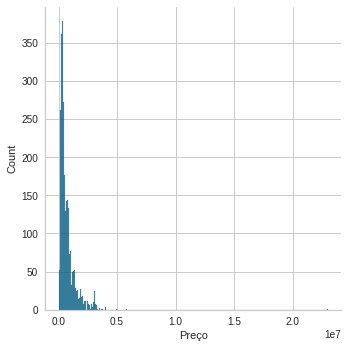

In [ ]:
sns.displot(df['Preço']);

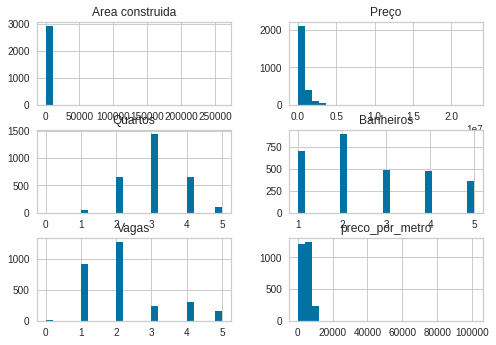

In [ ]:

df.hist(bins = 25);

#### 2.6.2 Categorical Attributes

In [ ]:
df.describe(include= 'category').T


,count,unique,top,freq
Categoria,2921,2,Apartamentos,1682
Bairro,2838,105,Jóquei,241


In [ ]:
# Percentual de cada Categoria
df.Categoria.value_counts(normalize=True)

Apartamentos    0.57583
Casas           0.42417
Name: Categoria, dtype: float64

In [ ]:
# Percentual nos 10 primeiros bairros
df.Bairro.value_counts(normalize=True)[:10]

Jóquei           0.084919
Uruguai          0.081395
Fátima           0.063425
Ininga           0.061311
Morros           0.058844
Gurupi           0.055673
Santa Isabel     0.050035
São Cristóvão    0.047569
Horto            0.045455
Vale Quem Tem    0.027484
Name: Bairro, dtype: float64

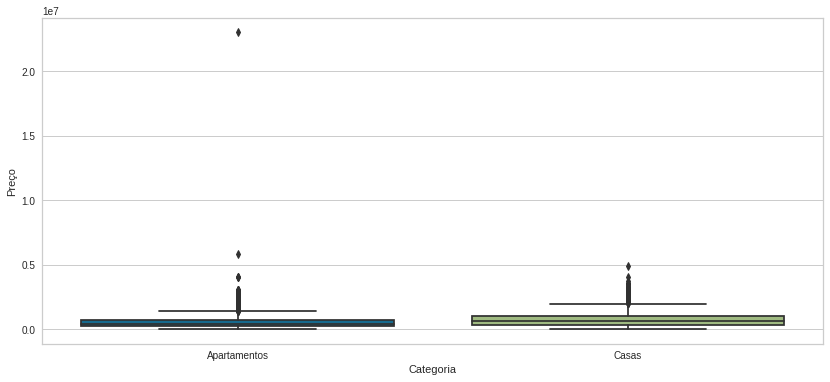

In [ ]:
fig = plt.subplots(figsize = (14,6))

sns.boxplot( x='Categoria', y='Preço', data=df );


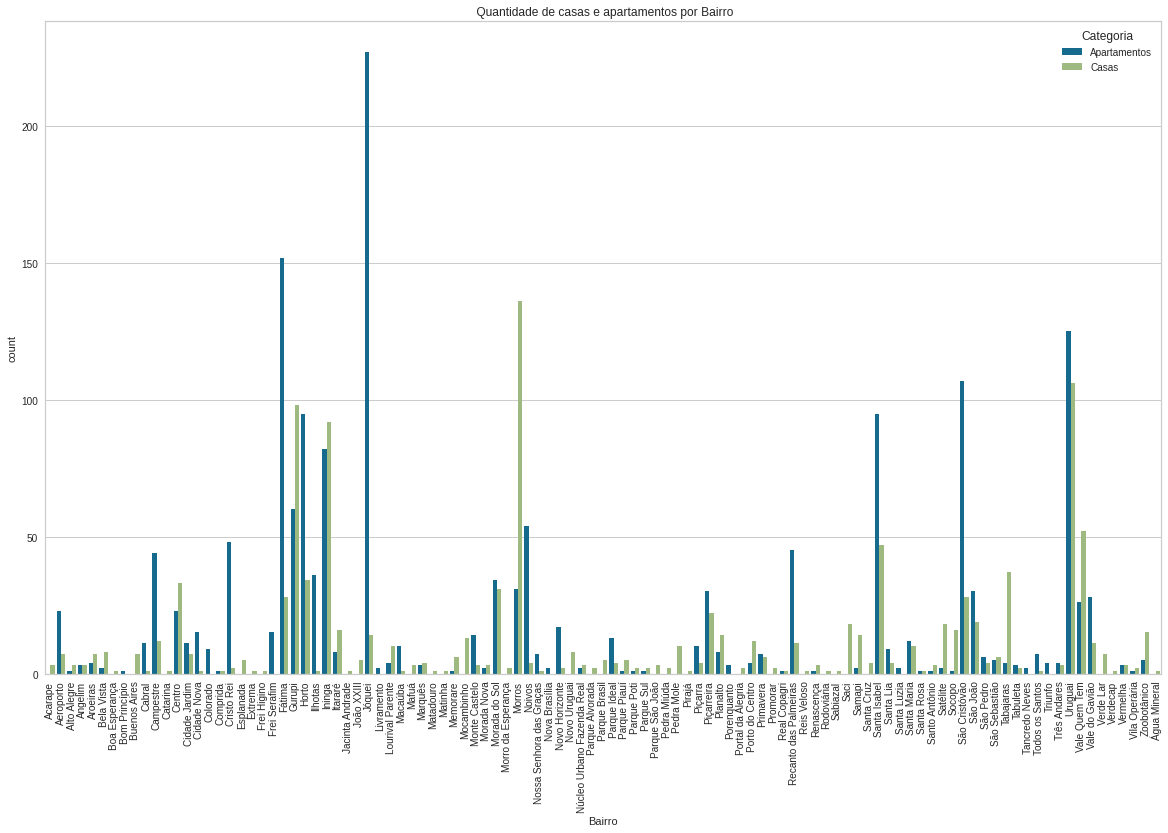

In [ ]:
fig = plt.subplots(figsize = (20,12))
sns.countplot(x ='Bairro', hue= 'Categoria',data = df );
plt.title(" Quantidade de casas e apartamentos por Bairro")
plt.xticks(rotation=90);

## 3. Feature Engineering

In [ ]:
df1 = df

### 3.1 Mapa Mental de Hipótese

In [ ]:
# TODO Imagem

#### 3.2 Criação de Hipoteses

- Bairros mais centrais, os imóveis são mais caros?
- Preços de imóveis  variam de dependendo do bairro
- Quanto mais quartos, mais caro o imóvel?
- Quanto mais banheiros, mais caro o imóvel?
- Casas são mais caras que apartamentos?
- Quanto maior a área construída, maior o preço?
- TODO

### 3.3 Feature Enginnering

In [ ]:
# TODO

In [ ]:
 
df1['QuartosporAreaConstruida'] = df1['Quartos'] / df1['Area construida']
df1['LogAreadivBanheiro'] = np.log(df1['Banheiros'] / df1['Area construida'])

# Log das áreas
df1['LogAreaConstruida'] = np.log1p(df1['Area construida'])

### 2.5 Filter variables

In [ ]:
# Filtra valores preco e area construida com base na statistica
df1 = df1[df.Preço < 1000000][df1['Area construida'] < 800]

# 3. Análise Exploratória de Dados EDA

### 3.1 Análise Univariada

In [ ]:
# TODO

### 3.2 Análise Bivariada

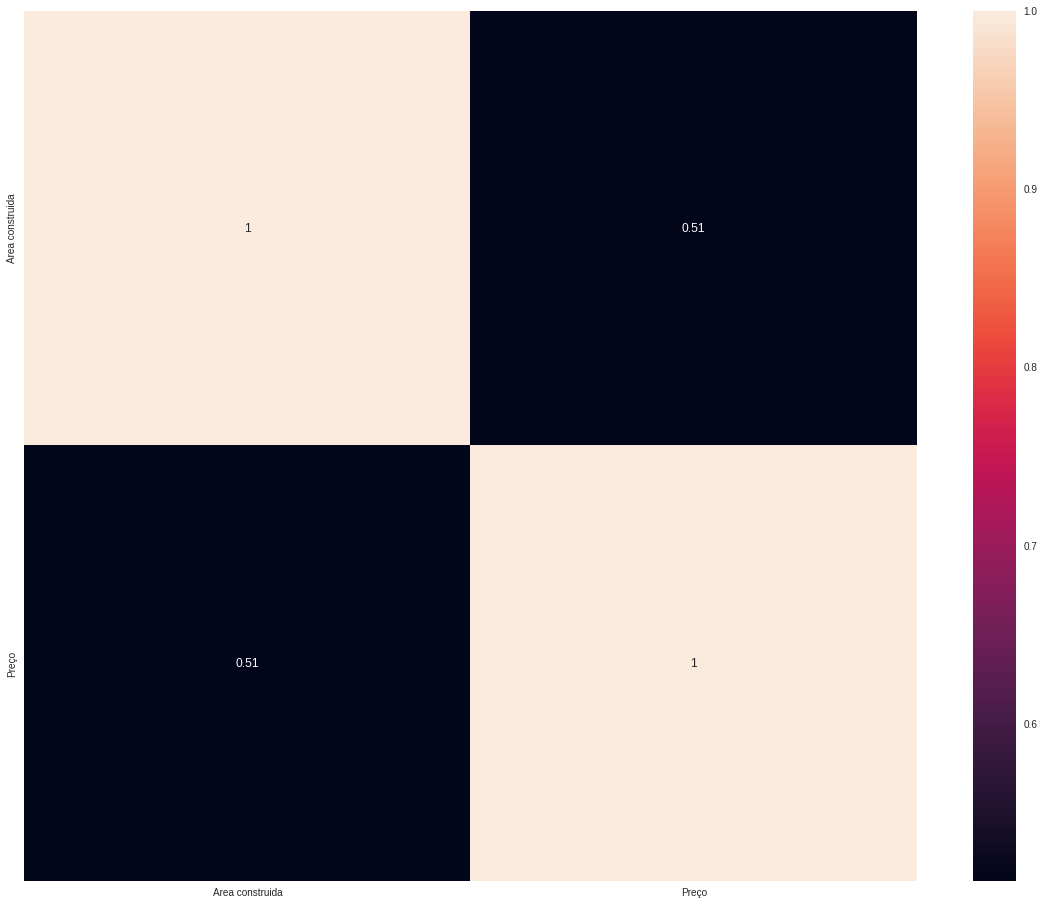

In [ ]:
num = df1.select_dtypes( include=['int32', 'float64'] )

fig = plt.subplots(figsize = (20,16))

correlation = num.corr( method='pearson' )
sns.heatmap( correlation, annot=True );
plt.show();

In [ ]:
for coluna in df1.columns:
    print(coluna.upper())
    grafico = px.histogram(df1, x=coluna, color="Categoria");
    grafico.show()

CATEGORIA


AREA CONSTRUIDA


PREÇO


QUARTOS


BANHEIROS


VAGAS


BAIRRO


### 3.2.1 H. Preços de imóveis  variam de dependendo do bairro
**VERDADEIRA**

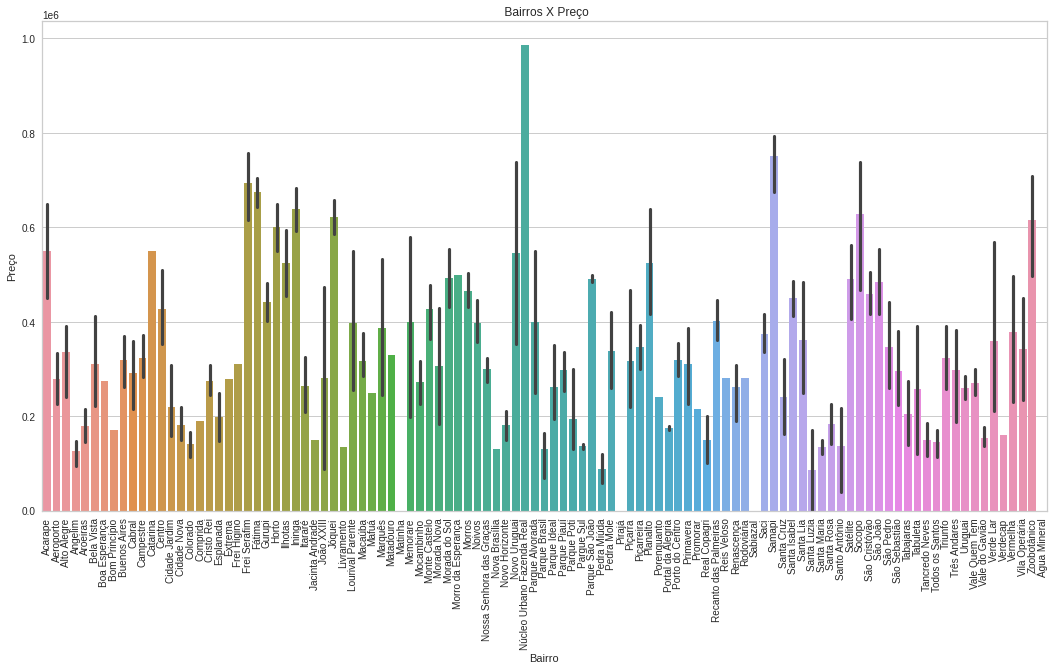

In [ ]:
fig = plt.subplots(figsize = (18,9))

sns.barplot( x='Bairro', y='Preço', data=df1);
plt.title(" Bairros X Preço");
plt.xticks(rotation=90);

### 3.3.2 H. - Quanto mais quartos, mais caro o imóvel?
**FALSO** Imóveis de 1 dorm são mais caros que de 2 dorm , imóveis de 4 e 5 dorm menor variação de preço

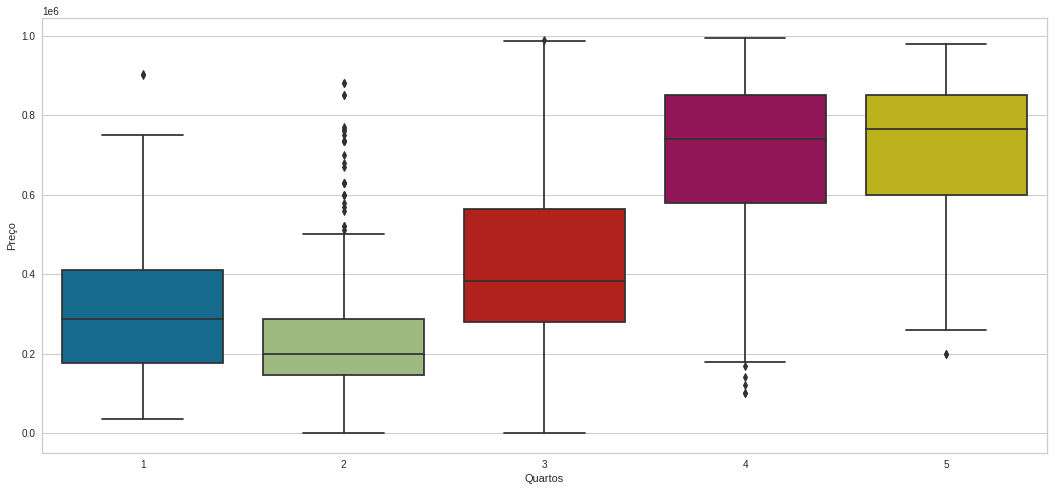

In [ ]:
fig = plt.subplots(figsize = (18,8))

sns.boxplot( x='Quartos', y='Preço', data=df1);


### 3.3.3 H.- Quanto mais banheiros, mais caro o imóvel?
**VERDADEIRO**


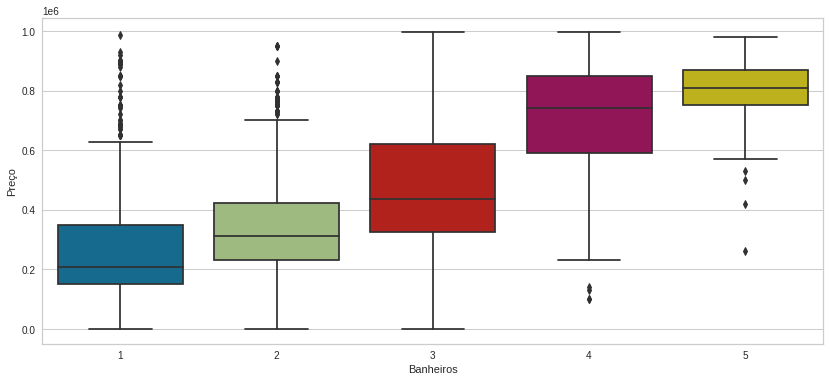

In [ ]:
fig = plt.subplots(figsize = (14,6))
sns.boxplot( x='Banheiros', y='Preço', data=df1);


### 3.3.4 H. - Quanto maior a área construída, maior o preço?
**FALSO**


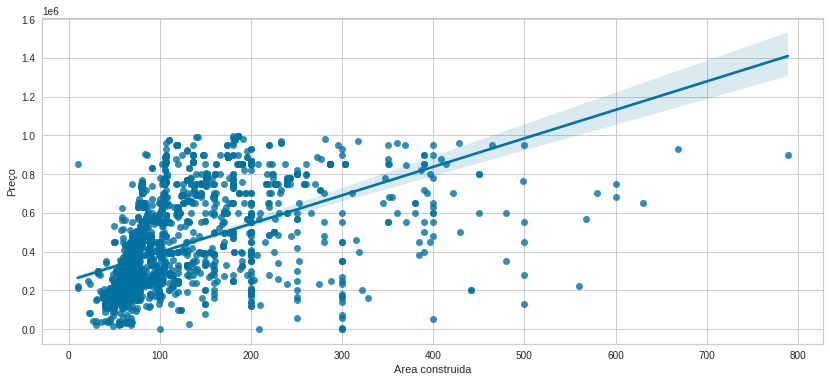

In [ ]:
fig = plt.subplots(figsize = (14,6))
sns.regplot( x ='Area construida', y='Preço', data=df1);

### 3.3.4 H. - Casas são mais caras que apartamentos?
**VERDADEIRO**


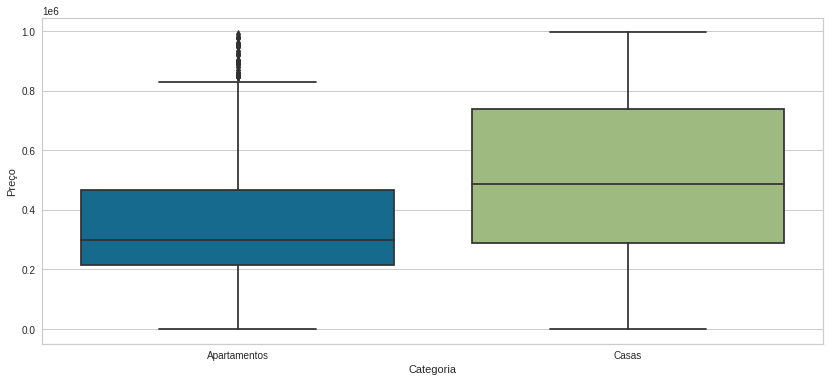

In [ ]:
fig = plt.subplots(figsize = (14,6))

sns.boxplot( x='Categoria', y='Preço', data=df1 );

# DÚVIDAS, GALERA:

## SERÁ QUE É NECESSÁRIO FAZER A VALIDAÇÂO ESTATÌSTICA????

## A PREPARAÇÃO (transofrmação) ANTES OU DEPOIS DA SEPARACAO ? para não ´passar` info 

# se depois separar em treino, teste e validation antes 

# 4. DATA PREPARATION

In [ ]:
df2 = df1.copy()

## 4.1 Normalização

## 4.2 Rescalling

## 4.3 Transformation


### 4.3.1 Encoding

In [72]:
df2.head(2)

NameError: ignored

In [73]:
# BAirro e Categoria - Label Encoding
le = LabelEncoder()
df2['Bairro'] = le.fit_transform( df2['Bairro'] )
pickle.dump( le, open( 'parametros/bairro_scaler.pkl', 'wb') )
                                      
df2['Categoria'] = le.fit_transform(df2.Categoria)   
pickle.dump( le, open( 'parametros/categoria_scaler.pkl', 'wb') )
                                     


NameError: ignored

### 4.3.2 Response Variable Transformation

In [ ]:
#transf. logarítma 0 grande variação (range) de preço
df2['Preço'] = np.log1p( df2.Preço)

In [ ]:
df2.sample(1)

# 5. FEATURE SELECTION

In [ ]:
df3 = df2.copy()

In [ ]:
# TODO
#Peguei todas só para testar, mas vale analisar melhor


## 5.1. Split dataframe into training and test dataset

In [ ]:
X = df3.drop("Preço", axis=1)
y = df3.Preço

In [ ]:
# dividindo em treino, teste e validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

## 5.2 Feature Importance


In [ ]:
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X_train, y_train)           
visualizer.transform(X_train)        
visualizer.show();

### 5.3 Boruta as Feature Selector

In [ ]:
# TODO - ???


### 5.4 Final Feature Selection

In [ ]:
# TODO

# 6. MACHINE LEARNING MODELLIG